In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Check & cleaning data

In [8]:
df = pd.read_csv('ai_job_market_insights.csv')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [9]:
df['Salary_USD'].info()
# df['Salary_USD'].astype('float')

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Salary_USD
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


## Tổng quan về thị trường việc làm AI

#### Thị trường AI hiện tại có những ngành nào?

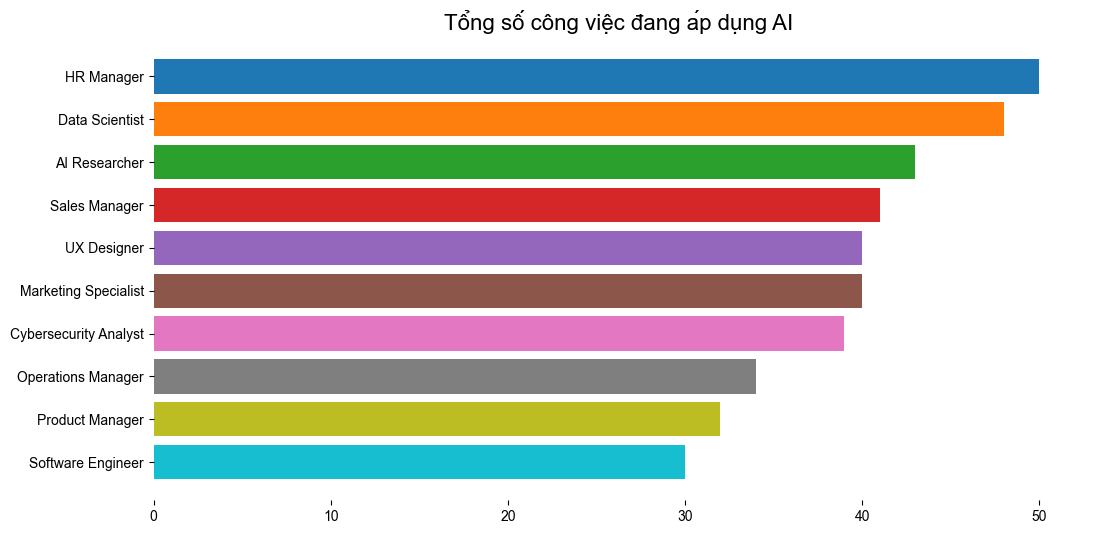

In [ ]:
job_count = df['Job_Title'].value_counts().sort_values(ascending=True)
job_count

colors = sns.color_palette("tab10", len(job_count))[::-1]
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(12,6))
plt.barh(job_count.index, job_count.values, color=colors)
plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(False)    
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)   
ax.spines['bottom'].set_visible(False) 

plt.title('Tổng số công việc đang áp dụng AI', fontsize=16)
plt.show()

##### Hình ảnh cho thấy sự phân bố áp dụng AI trong các công việc khác nhau, với các vị trí như Data Scientist và AI Researcher có mức độ áp dụng AI cao nhất, phản ánh xu hướng công nghệ trong lĩnh vực kỹ thuật và phân tích dữ liệu. Trong khi đó, các vai trò như HR Manager và Sales Manager có mức độ áp dụng thấp hơn, cho thấy AI chưa phổ biến trong các lĩnh vực quản lý và tiếp thị. Sự hiện diện của AI trong các vai trò như Cybersecurity Analyst và Operations Manager cũng cho thấy AI đang dần trở nên quan trọng trong nhiều khía cạnh của doanh nghiệp, từ bảo mật đến quản lý vận hành. Điều này mở ra cơ hội phát triển cho các chuyên gia trong lĩnh vực AI và Data Science, đồng thời giúp các tổ chức định hướng chiến lược phù hợp với xu hướng công nghệ hiện nay.


#### Các chức danh công việc phổ biến nhất trong ngành AI là gì?

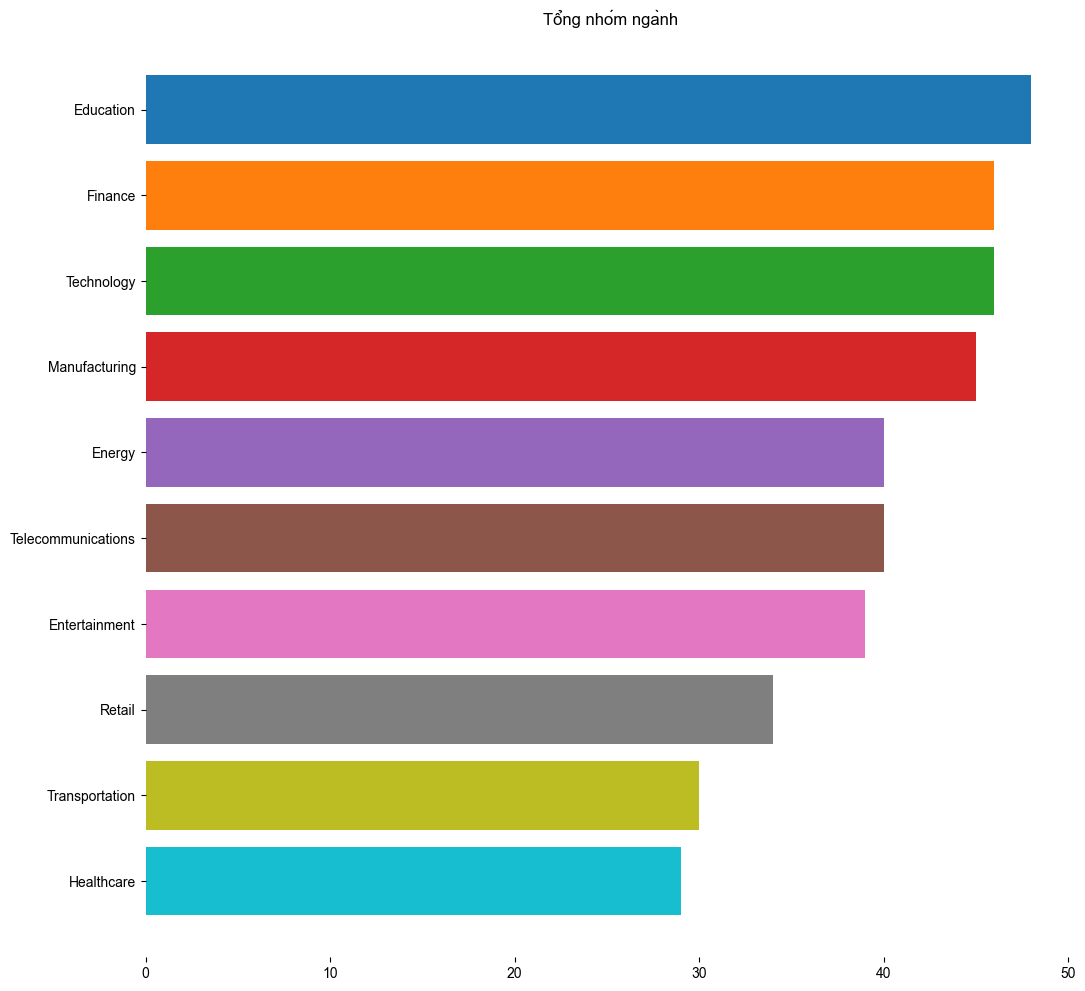

In [80]:
industry_count = df['Industry'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(12,12))

plt.barh(industry_count.index, industry_count.values, color = colors)
plt.title('Tổng nhóm ngành')
# Xóa khung viền chính xác
ax = plt.gca()
ax.spines['top'].set_visible(False)    
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)   
ax.spines['bottom'].set_visible(False) 
plt.show()

#### Số lượng công việc AI theo từng quốc gia

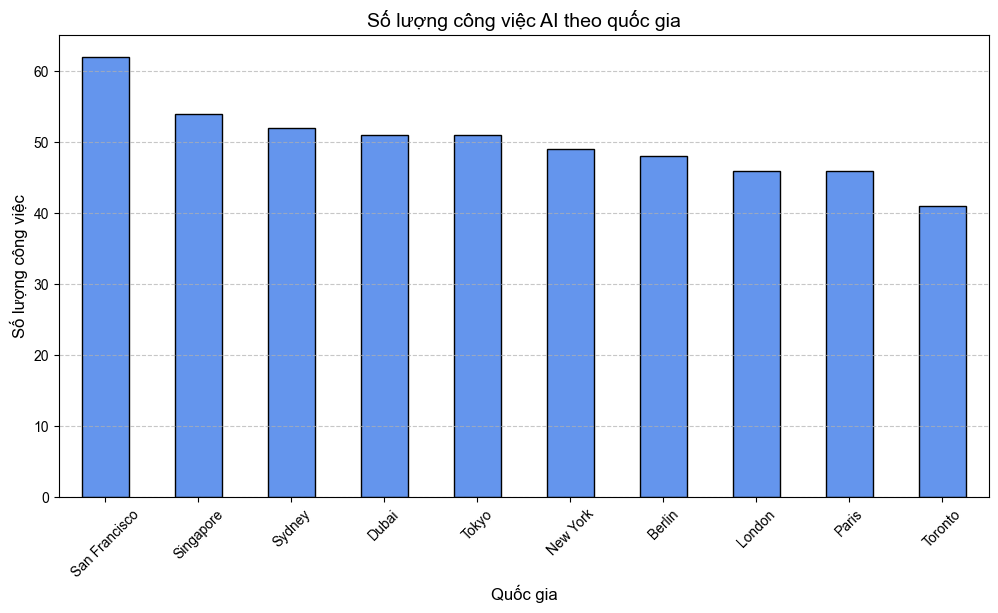

In [ ]:
#biểu đồ số lượng công việc AI theo từng quốc gia
country_counts = df['Location'].value_counts()

plt.figure(figsize=(12, 6))
country_counts.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Số lượng công việc AI theo quốc gia", fontsize=14)
plt.xlabel("Quốc gia", fontsize=12)
plt.ylabel("Số lượng công việc", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### Quy mô doanh nghiệp áp dụng AI

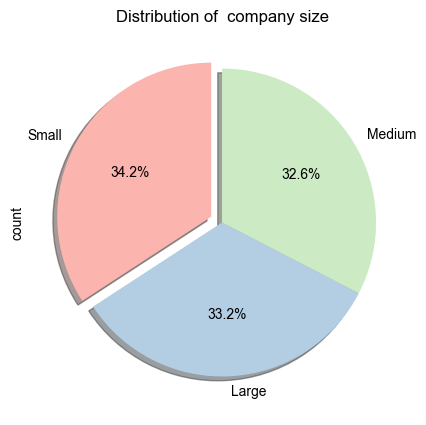

In [57]:
colors = plt.get_cmap('Pastel1').colors
df["Company_Size"].value_counts().plot(kind='pie', startangle=90 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  company size', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

#### Mức lương trung bình của ngành AI so với mặt bằng chung ra sao?


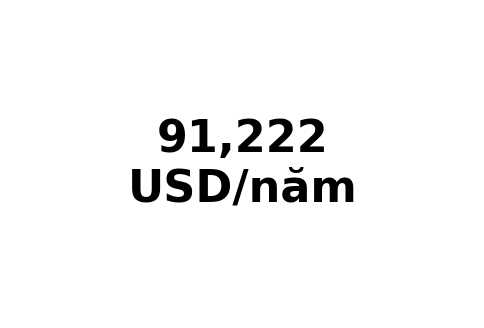

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

ax.text(0.5, 0.5, "91,222\nUSD/năm", color="black", fontsize=32, fontweight="bold", 
        ha="center", va="center", family="sans-serif")

ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.show()


#### Ngành áp dụng AI mạnh nhất

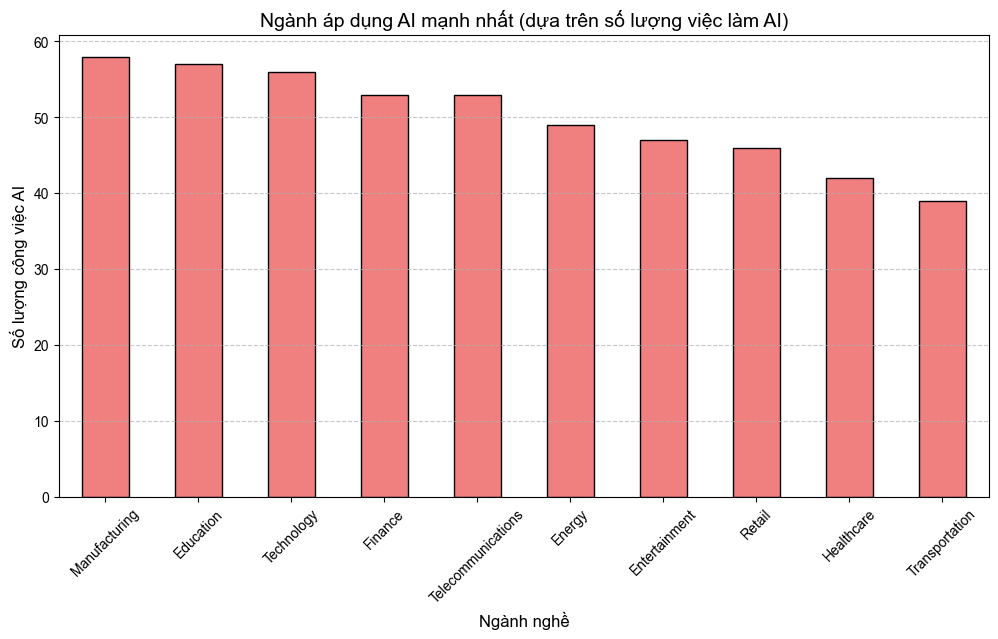

'Manufacturing'

In [ ]:
#số lượng công việc AI theo ngành để xác định ngành áp dụng AI mạnh nhất
ai_adoption_by_industry = df["Industry"].value_counts()

plt.figure(figsize=(12, 6))
ai_adoption_by_industry.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Ngành áp dụng AI mạnh nhất (dựa trên số lượng việc làm AI)", fontsize=14)
plt.xlabel("Ngành nghề", fontsize=12)
plt.ylabel("Số lượng công việc AI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

top_ai_industry = ai_adoption_by_industry.idxmax()
top_ai_industry


#### Công việc theo mức độ rủi ro tự động hóa

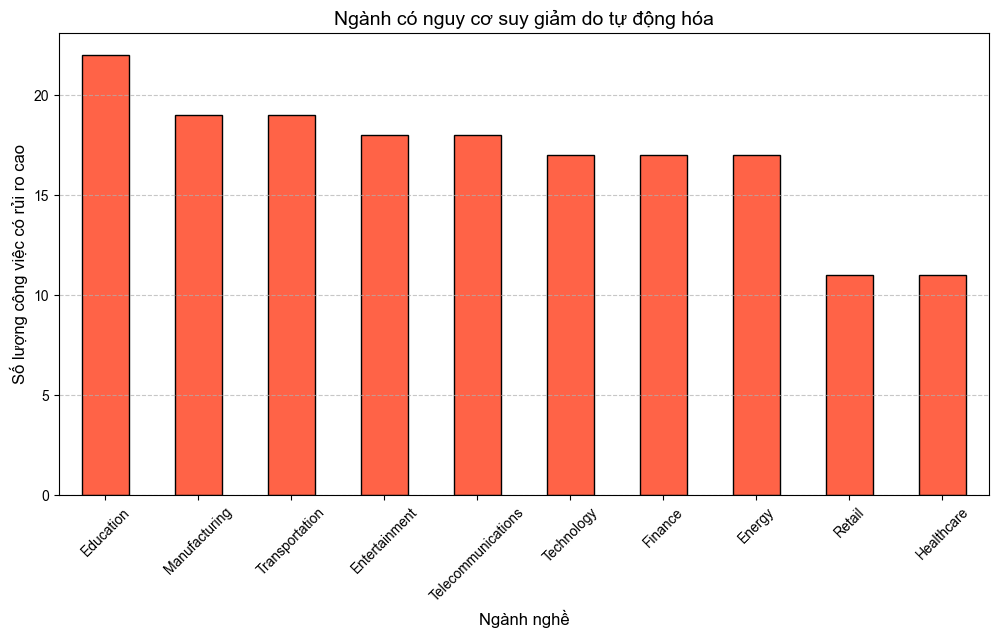

'Education'

In [ ]:
#số lượng công việc theo mức độ rủi ro tự động hóa
automation_risk_counts = df["Automation_Risk"].value_counts()

#những ngành có rủi ro tự động hóa cao
high_risk_jobs = df[df["Automation_Risk"] == "High"]
high_risk_industries = high_risk_jobs["Industry"].value_counts()

plt.figure(figsize=(12, 6))
high_risk_industries.plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Ngành có nguy cơ suy giảm do tự động hóa", fontsize=14)
plt.xlabel("Ngành nghề", fontsize=12)
plt.ylabel("Số lượng công việc có rủi ro cao", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

most_at_risk_industry = high_risk_industries.idxmax()
most_at_risk_industry


## Phân bổ ngành nghề trong lĩnh vực AI

#### Top 5 ngành có nhiều công việc AI nhất

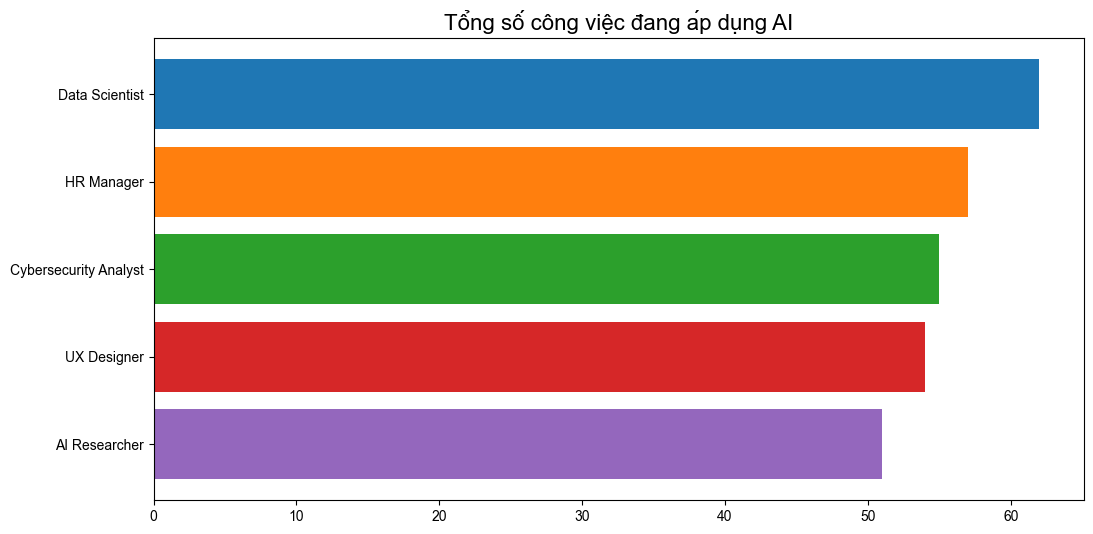

In [19]:
job_count = df['Job_Title'].value_counts().sort_values(ascending=True).tail(5)
job_count


colors = sns.color_palette("tab10", len(job_count))[::-1]
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(12,6))
plt.barh(job_count.index, job_count.values, color = colors)
plt.title('Tổng số công việc đang áp dụng AI', fontsize = '16',)
plt.show()

## Mức lương AI theo ngành

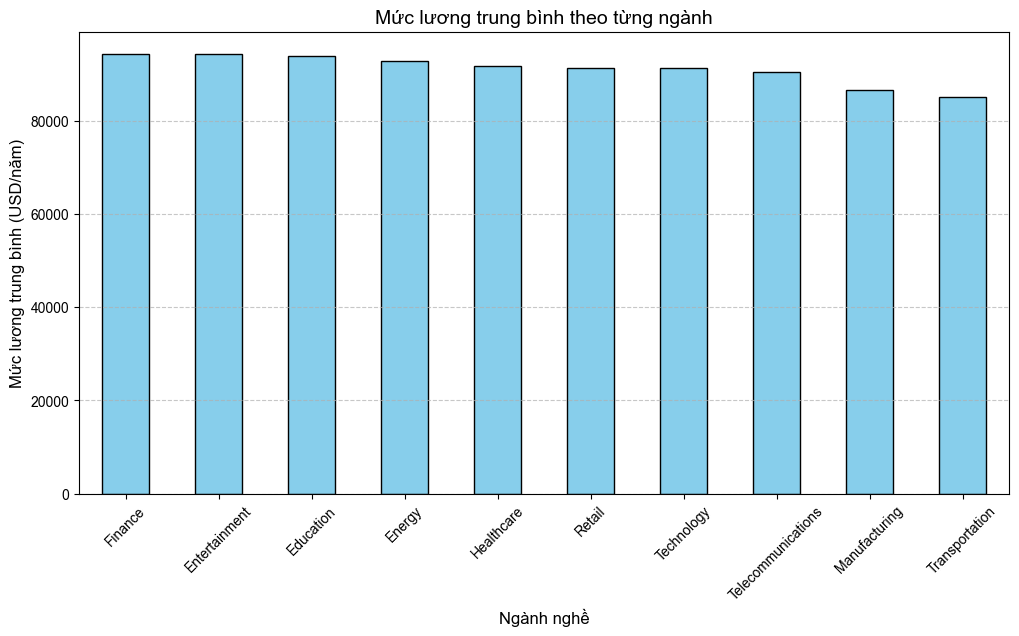

In [ ]:
#mức lương trung bình theo từng ngành
salary_by_industry = df.groupby("Industry")["Salary_USD"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
salary_by_industry.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Mức lương trung bình theo từng ngành", fontsize=14)
plt.xlabel("Ngành nghề", fontsize=12)
plt.ylabel("Mức lương trung bình (USD/năm)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [68]:
import plotly.express as px

# Vẽ box plot tương tác
fig = px.box(df, x="Salary_USD", title="Phân bố mức lương trong ngành AI (USD/năm)", 
             template="plotly_white")  # Giao diện đẹp hơn

# Cải thiện giao diện
fig.update_layout(
    xaxis_title="Mức lương (USD)",
    yaxis_title="",
    hovermode="x",  # Hover để xem chi tiết
    boxmode="overlay"  # Tránh trùng lặp boxplot nếu có nhiều nhóm
)

# Hiển thị biểu đồ
fig.show()



## Kỹ năng AI quan trọng nhất cho thị trường lao động

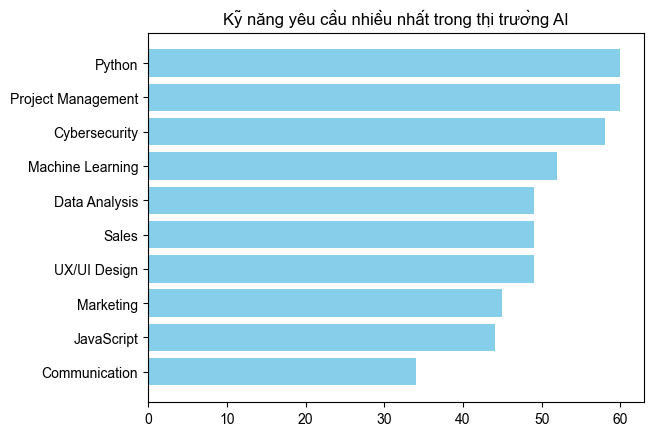

In [47]:
skill_count = df['Required_Skills'].value_counts().sort_values(ascending=True)
skill_count

plt.barh(skill_count.index, skill_count.values, color = 'skyblue')
plt.title("Kỹ năng yêu cầu nhiều nhất trong thị trường AI")
plt.show()

In [65]:
import pandas as pd
import plotly.express as px

# Ánh xạ một số thành phố lớn sang quốc gia
city_to_country = {
    "New York": "United States",
    "San Francisco": "United States",
    "London": "United Kingdom",
    "Berlin": "Germany",
    "Tokyo": "Japan",
    "Paris": "France",
    "Singapore": "Singapore",
    "Toronto": "Canada",
}

# Chuyển đổi "Location" thành "Country"
df["Country"] = df["Location"].map(city_to_country)
df = df.dropna(subset=["Country"])  # Bỏ dòng không ánh xạ được

# Tính mức lương trung bình theo quốc gia
salary_by_country = df.groupby("Country")["Salary_USD"].mean().reset_index()

# Vẽ bản đồ với giao diện đẹp hơn
fig = px.choropleth(
    salary_by_country,
    locations="Country",
    locationmode="country names",
    color="Salary_USD",
    hover_name="Country",
    color_continuous_scale="plasma",  # Màu sắc đẹp hơn
    title="💰 Mức lương trung bình theo khu vực (USD/năm)",
    projection="natural earth"  # Hiển thị bản đồ dạng Trái Đất cong
)

# Cải thiện giao diện
fig.update_layout(
    geo=dict(
        showframe=False,   # Bỏ khung bản đồ
        showcoastlines=True,  # Hiển thị đường bờ biển
        coastlinecolor="black",
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="💵 Lương (USD)",  # Tiêu đề thang màu
        tickprefix="$"
    )
)

# Hiển thị bản đồ
fig.show()

